In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
"""
data_paths = [
    "../../data/mlm/windows/five_prime_UTR.test/512/128/seqs.txt",
    "../../data/mlm/windows/three_prime_UTR.test/512/128/seqs.txt",
    "../../data/mlm/windows/CDS.test/512/128/seqs.txt",
    "../../data/mlm/windows/val_all/512/256/seqs.txt",
    "../../data/mlm/windows/val/512/256/seqs.txt",
]
model_paths = [
    "results_512_convnet/checkpoint-1000000",
    "results_512_convnet_ftAth_alone/checkpoint-100000",
    "results_512_convnet_ftAth_alone/checkpoint-500000",
    "results_512_convnet_ftAth_alone/checkpoint-1000000",
]
"""


data_paths = [
    "../../data/mlm/dataset/test/Arabidopsis_thaliana.test.512.256.parquet",
]
model_paths = (
    [f"results_512_convnet_only_athaliana/checkpoint-{ckpt}" for ckpt in np.arange(100000, 1100000, 100000)] +
    [f"results_512_convnet_only_athaliana_lower_lr_v2/checkpoint-{ckpt}"  for ckpt in np.arange(20000, 100000, 20000)]
)

In [3]:
rows = []
for data_path in data_paths:
    for model_path in model_paths:
        path = f"results/perplexity/{data_path.replace('/', '_')}/{model_path.replace('/', '_')}/perplexity.txt"
        perplexity = float(np.loadtxt(path))
        rows.append([data_path, model_path, perplexity])
df = pd.DataFrame(rows, columns=["data_path", "model_path", "perplexity"])
df

,data_path,model_path,perplexity
0,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.164647
1,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.128463
2,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.111569
3,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.097908
4,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.091983
5,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.084268
6,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.075726
7,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.069445
8,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.068202
9,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.063838


In [9]:
df["steps"] = df.model_path.str.split('-').str[-1].astype(int)
df.loc[df.model_path.str.contains("lower_lr"), "steps"] += 1000000
df

,data_path,model_path,perplexity,steps
0,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.164647,100000
1,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.128463,200000
2,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.111569,300000
3,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.097908,400000
4,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.091983,500000
5,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.084268,600000
6,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.075726,700000
7,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.069445,800000
8,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.068202,900000
9,../../data/mlm/dataset/test/Arabidopsis_thalia...,results_512_convnet_only_athaliana/checkpoint-...,3.063838,1000000


In [4]:
"""df.loc[df.model_path=="results_512_convnet/checkpoint-1000000", "steps"] = 0
df.loc[df.model_path=="results_512_convnet_ftAth_alone/checkpoint-100000", "steps"] = 100000
df.loc[df.model_path=="results_512_convnet_ftAth_alone/checkpoint-500000", "steps"] = 500000
df.loc[df.model_path=="results_512_convnet_ftAth_alone/checkpoint-1000000", "steps"] = 1000000
"""

'df.loc[df.model_path=="results_512_convnet/checkpoint-1000000", "steps"] = 0\ndf.loc[df.model_path=="results_512_convnet_ftAth_alone/checkpoint-100000", "steps"] = 100000\ndf.loc[df.model_path=="results_512_convnet_ftAth_alone/checkpoint-500000", "steps"] = 500000\ndf.loc[df.model_path=="results_512_convnet_ftAth_alone/checkpoint-1000000", "steps"] = 1000000\n'

In [6]:
"""df.loc[df.data_path.str.contains("five_prime_UTR"), "Region"] = "5' UTR"
df.loc[df.data_path.str.contains("three_prime_UTR"), "Region"] = "3' UTR"
df.loc[df.data_path.str.contains("CDS"), "Region"] = "CDS"
df.loc[df.data_path.str.contains("val_all"), "Region"] = "All"
df.loc[df.data_path.str.contains("val/"), "Region"] = "All (no repeats)"
"""

'df.loc[df.data_path.str.contains("five_prime_UTR"), "Region"] = "5\' UTR"\ndf.loc[df.data_path.str.contains("three_prime_UTR"), "Region"] = "3\' UTR"\ndf.loc[df.data_path.str.contains("CDS"), "Region"] = "CDS"\ndf.loc[df.data_path.str.contains("val_all"), "Region"] = "All"\ndf.loc[df.data_path.str.contains("val/"), "Region"] = "All (no repeats)"\n'

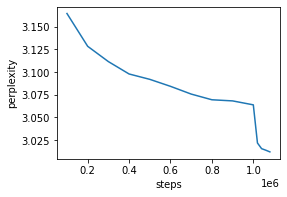

In [25]:
plt.figure(figsize=(4, 2.8))
sns.lineplot(
    data=df,
    x="steps",
    y="perplexity",
    #markers=True,
    #hue="Region",
)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.savefig("perplexity_vs_steps.svg", bbox_inches='tight')